In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/vedik/Desktop/Deep Learning/Project/Deep-Learning-Project/measures_filtered.csv')

In [7]:
random_sample = df.sample(n=75, random_state=1)

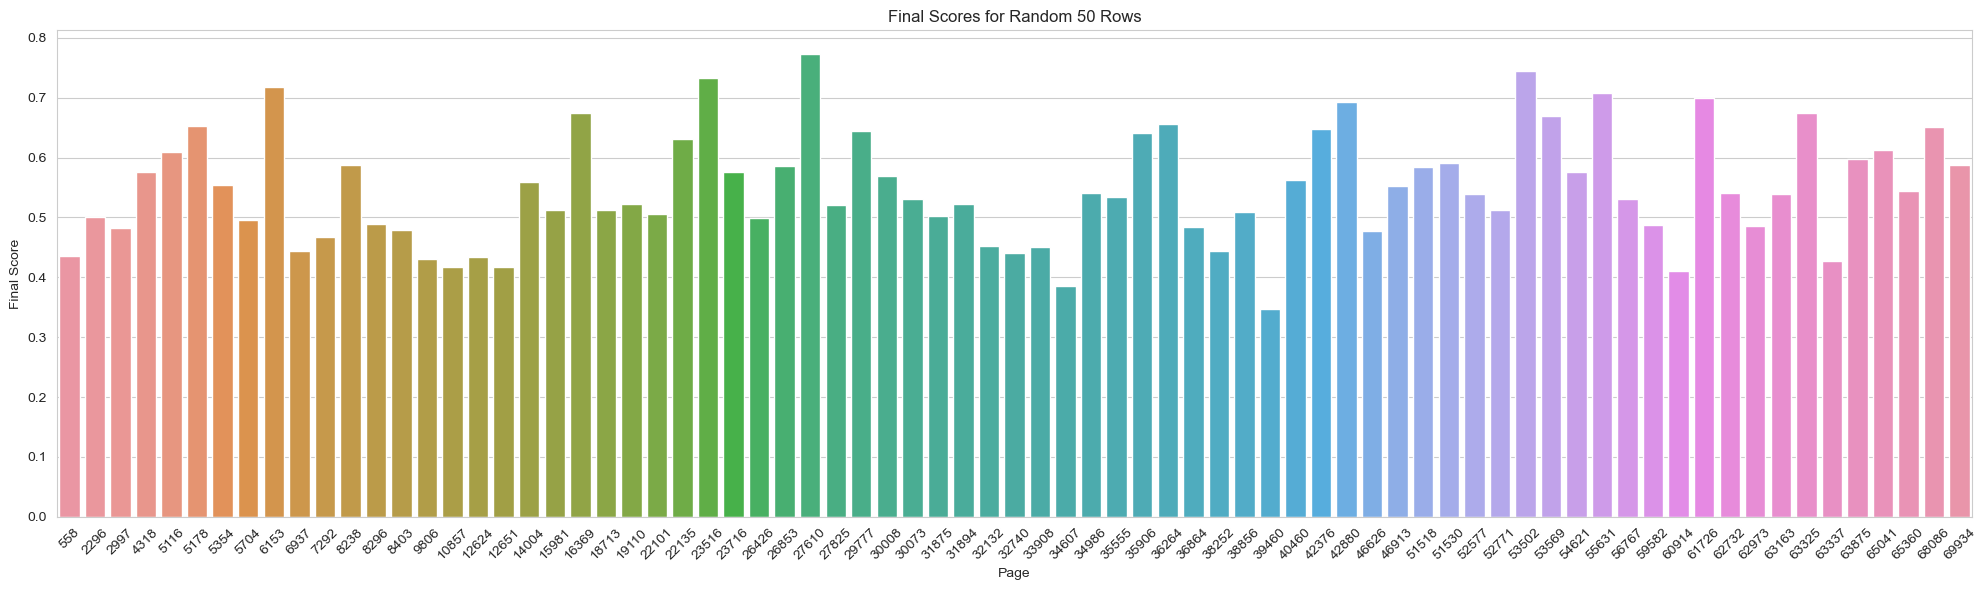

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='Page', y='Final Score', data=random_sample)
plt.xlabel('Page')
plt.ylabel('Final Score')
plt.title('Final Scores for Random 50 Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

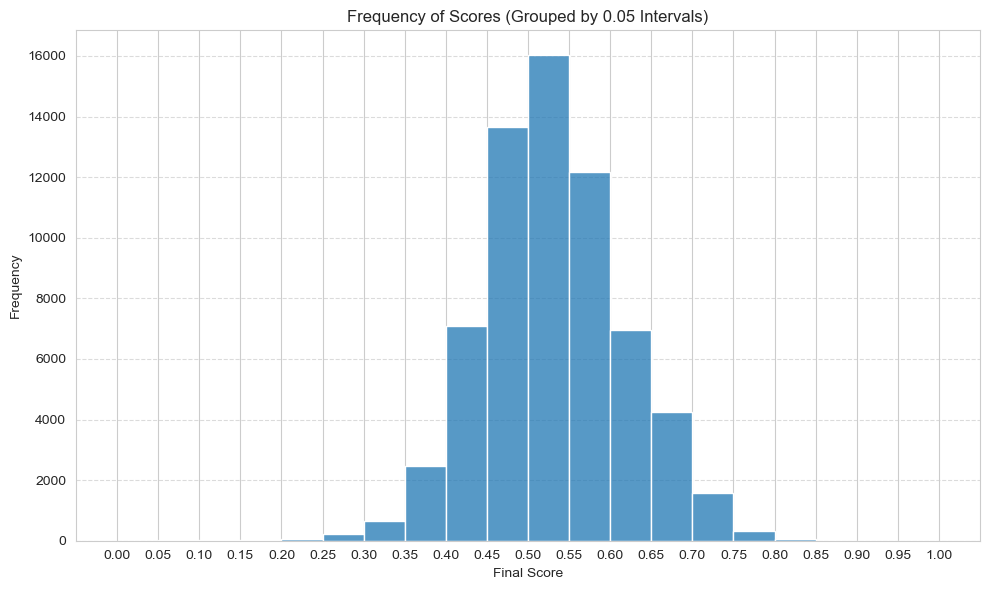

In [9]:
bins = [i/20 for i in range(21)]  # Creates bins from 0 to 1 in intervals of 0.05

# Create a histogram of 'Final Score' with grouped bins
plt.figure(figsize=(10, 6))
sns.histplot(df['Final Score'], bins=bins, kde=False)
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Frequency of Scores (Grouped by 0.05 Intervals)')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
df['Score Bins'] = pd.cut(df['Final Score'], bins=bins, include_lowest=True)

# Count the frequencies of scores in each bin
bin_frequencies = df['Score Bins'].value_counts().sort_index()

# Print the frequencies
print("Bin Intervals\tFrequency")
for interval, frequency in bin_frequencies.items():
    print(f"{interval}\t\t{frequency}")

Bin Intervals	Frequency
(-0.001, 0.05]		3
(0.05, 0.1]		17
(0.1, 0.15]		30
(0.15, 0.2]		23
(0.2, 0.25]		41
(0.25, 0.3]		219
(0.3, 0.35]		637
(0.35, 0.4]		2451
(0.4, 0.45]		7078
(0.45, 0.5]		13660
(0.5, 0.55]		16042
(0.55, 0.6]		12177
(0.6, 0.65]		6955
(0.65, 0.7]		4249
(0.7, 0.75]		1586
(0.75, 0.8]		331
(0.8, 0.85]		56
(0.85, 0.9]		2
(0.9, 0.95]		0
(0.95, 1.0]		0


In [11]:
good_threshold = 0.6 
bad_threshold = 0.4  

# Create a new column 'Score Category' based on the 'Final Score' column using the thresholds
df['Score Category'] = pd.cut(df['Final Score'], bins=[-float('inf'), bad_threshold, good_threshold, float('inf')],
                              labels=['Poor', 'Fair', 'Good'])

In [12]:
# Assuming df is your DataFrame with the 'Final Score' column and 'Score Category' already created
# Replace 'df' with the actual name of your DataFrame if different

# Filter the DataFrame for each category
poor_range = df[df['Score Category'] == 'Poor']['Final Score'].agg(['min', 'max'])
fair_range = df[df['Score Category'] == 'Fair']['Final Score'].agg(['min', 'max'])
good_range = df[df['Score Category'] == 'Good']['Final Score'].agg(['min', 'max'])

# Print the range for each category
print("Poor Range:", poor_range.values)
print("Fair Range:", fair_range.values)
print("Good Range:", good_range.values)


Poor Range: [0.00742386 0.39998719]
Fair Range: [0.4000011 0.5999989]
Good Range: [0.60000603 0.86300292]


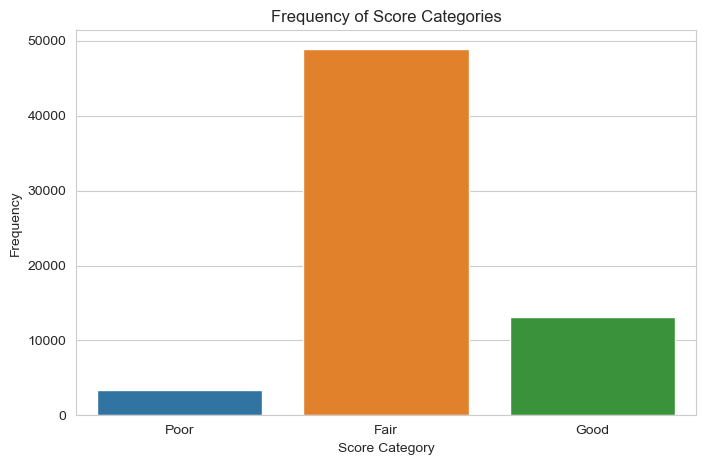

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Score Category', order=['Poor', 'Fair', 'Good'])
plt.xlabel('Score Category')
plt.ylabel('Frequency')
plt.title('Frequency of Score Categories')
plt.show()

In [14]:
df['Score Category'].value_counts()

Fair    48957
Good    13179
Poor     3421
Name: Score Category, dtype: int64

<h3> Downsampling </h3>

In [15]:
# Get the indices of bad screens
bad_indices = df[df['Score Category'] == 'Poor'].index

# Get the indices of neutral and good screens
neutral_indices = df[df['Score Category'] == 'Fair'].index
good_indices = df[df['Score Category'] == 'Good'].index

# Downsample neutral and good screens to match the number of bad screens
neutral_downsampled = df.loc[neutral_indices].sample(n=len(bad_indices), replace=False, random_state=1)
good_downsampled = df.loc[good_indices].sample(n=len(bad_indices), replace=False, random_state=1)

# Concatenate the downsampled DataFrames with the bad screens
downsampled_measures = pd.concat([df.loc[bad_indices], neutral_downsampled, good_downsampled])

# Save the downsampled DataFrame to a new CSV file
downsampled_measures.to_csv('downsampled_dataset.csv', index=False)

In [16]:
downsampled_measures['Score Category'].value_counts()

Poor    3421
Fair    3421
Good    3421
Name: Score Category, dtype: int64

<h3> Upsampling </h3>

In [17]:
import pandas as pd

# Assuming your DataFrame is named df

# Count the number of samples in each category
good_count = df[df['Score Category'] == 'Good'].shape[0]
fair_count = df[df['Score Category'] == 'Fair'].shape[0]
poor_count = df[df['Score Category'] == 'Poor'].shape[0]


# Duplicate data for good category
good_data = df[df['Score Category'] == 'Good'].sample(n=10000, replace=False)

fair_data = df[df['Score Category'] == 'Fair'].sample(n=10000, replace=False)

# Duplicate data for poor category
poor_data = df[df['Score Category'] == 'Poor']
duplicated_poor_data = poor_data.sample(n=10000-poor_count, replace=True)

# Concatenate duplicated data with original DataFrame
df_extended = pd.concat([good_data, fair_data, duplicated_poor_data, poor_data], ignore_index=True)

In [ ]:
#save csv
df_extended.to_csv('C:/Users/vedik/Desktop/Deep Learning/Project/Deep-Learning-Project/upsampled_dataset.csv', index=False)